In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

import datetime

In [2]:
df = pd.read_csv("data/ac_data.csv")

df.head()

,date_time,temperature_datetime,temperature,airQuality_datetime,airQuality
0,2023-06-11 01:07:06.889863,2023-6-10-17-7-7,25.3750,2023-6-10-17-7-9,449
1,2023-06-11 01:12:07.465380,2023-6-10-17-12-4,25.3125,2023-6-10-17-12-8,461
2,2023-06-11 01:17:08.019617,2023-6-10-17-17-5,25.3125,2023-6-10-17-17-7,454
3,2023-06-11 01:22:08.641555,2023-6-10-17-22-8,25.1875,2023-6-10-17-22-9,460
4,2023-06-11 01:27:09.215907,2023-6-10-17-27-5,25.0625,2023-6-10-17-27-7,482


In [3]:
df["date"] = pd.to_datetime(df["date_time"]).dt.date
df["time"] = pd.to_datetime(df["date_time"]).dt.time

df.head()

,date_time,temperature_datetime,temperature,airQuality_datetime,airQuality,date,time
0,2023-06-11 01:07:06.889863,2023-6-10-17-7-7,25.3750,2023-6-10-17-7-9,449,2023-06-11,01:07:06.889863
1,2023-06-11 01:12:07.465380,2023-6-10-17-12-4,25.3125,2023-6-10-17-12-8,461,2023-06-11,01:12:07.465380
2,2023-06-11 01:17:08.019617,2023-6-10-17-17-5,25.3125,2023-6-10-17-17-7,454,2023-06-11,01:17:08.019617
3,2023-06-11 01:22:08.641555,2023-6-10-17-22-8,25.1875,2023-6-10-17-22-9,460,2023-06-11,01:22:08.641555
4,2023-06-11 01:27:09.215907,2023-6-10-17-27-5,25.0625,2023-6-10-17-27-7,482,2023-06-11,01:27:09.215907


In [4]:
df["date"].max(), df["date"].min()

(datetime.date(2023, 6, 14), datetime.date(2023, 6, 11))

In [5]:
# 5 min intervals

In [6]:
print(df.shape)

df.isnull().sum()

(1045, 7)


date_time               0
temperature_datetime    0
temperature             0
airQuality_datetime     0
airQuality              0
date                    0
time                    0
dtype: int64

In [7]:
# time and index mapping
m1 = df[df["date"] == datetime.date(2023, 6, 11)].shape[0]
m2 = df[df["date"] == datetime.date(2023, 6, 12)].shape[0]
m3 = df[df["date"] == datetime.date(2023, 6, 13)].shape[0]
m4 = df[df["date"] == datetime.date(2023, 6, 14)].shape[0]
print(m1, m2, m3, m4)

274 288 287 196


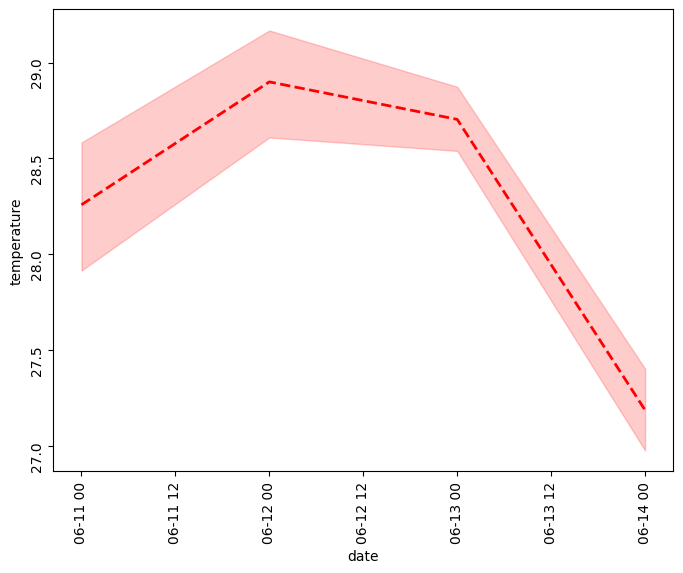

In [8]:
plt.figure (figsize = (8, 6))
ax = sns.lineplot (x = 'date', y = "temperature" , data = df, 
              linewidth = 2, color = 'red', linestyle = 'dashed')
ax.tick_params (rotation = 90)
plt.show ()

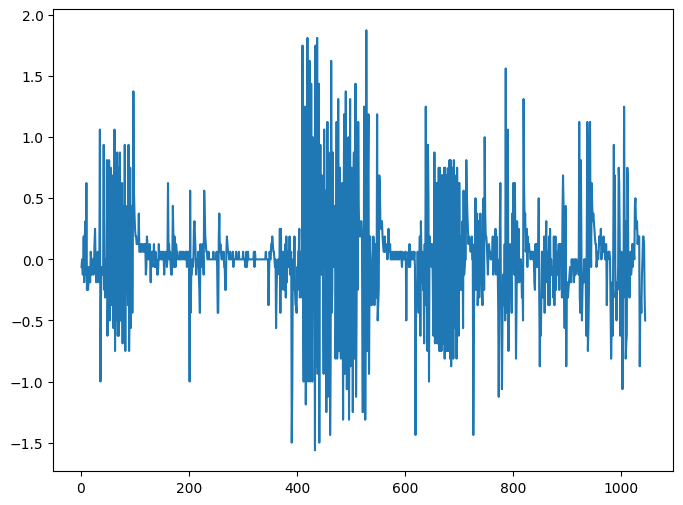

In [9]:
# checking seasonailty and trends
# 5 min trend
plt.figure(figsize=(8, 6))
plt.plot(df["temperature"].diff(periods=1))

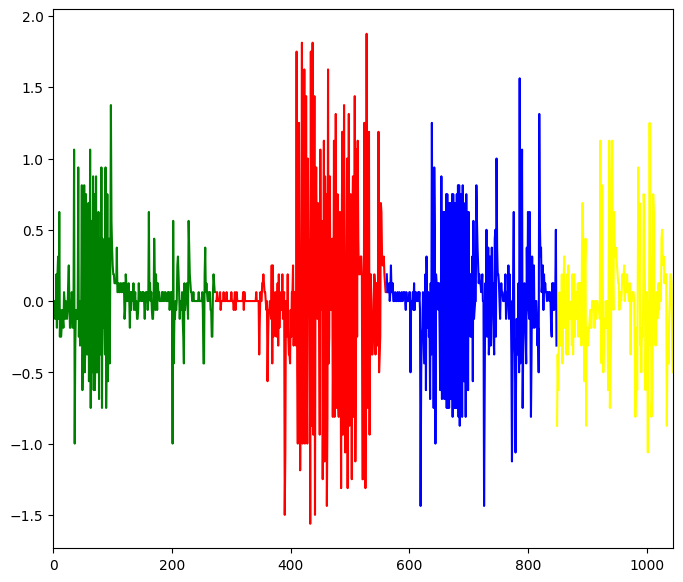

In [10]:
# 1 hr trend
l = df["temperature"].diff(periods=1)
m11 = l.iloc[0:m1]
m22 = l.iloc[m1:m1+m2]
m33 = l.iloc[m1+m2:m1+m2+m3]
m44 = l.iloc[m1+m2+m3:m1+m2+m3+m4]

_, ax = plt.subplots(figsize=[8, 7])
ax.plot(m11, color="green")
ax.plot(m22, color="red")
ax.plot(m33, color="blue")
ax.plot(m44, color="yellow")
ax.set_xlim([0. ,1045.])

plt.show()

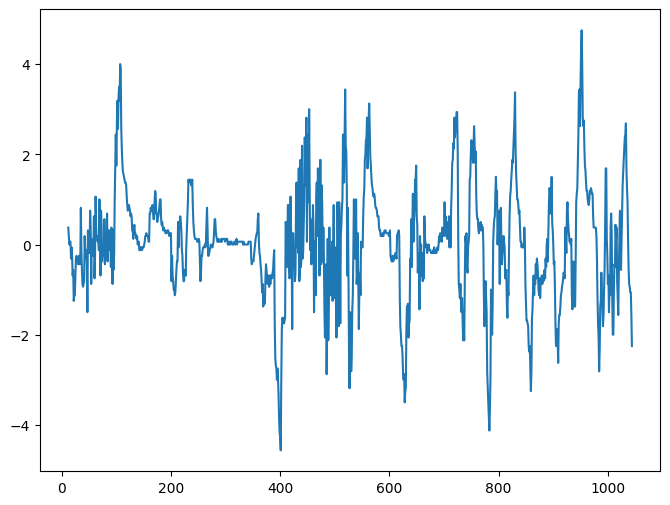

In [11]:
# 1 hr trend
plt.figure(figsize=(8, 6))
plt.plot(df["temperature"].diff(periods=12))

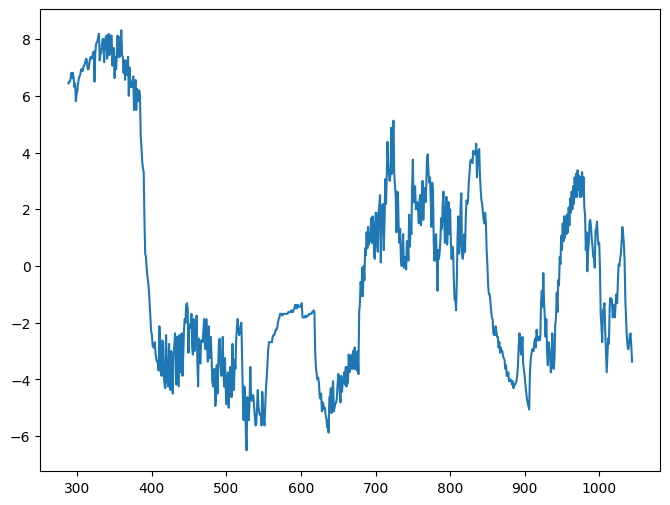

In [12]:
# 1 day trend
plt.figure(figsize=(8, 6))
plt.plot(df["temperature"].diff(periods=288))

In [13]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df["temperature"])[1])

Dickey–Fuller test: p=0.055406


In [14]:
# Well the series is not stationary, so we apply boxcox transformation

# p, lmbda = stats.boxcox(df["temperature"])
p = stats.boxcox(df["temperature"], 0.01)
# df['Weighted_Price_box'] = stats.boxcox(df.Weighted_Price, lmbda=0.04)
# just rying out different values
print(f"Dickey–Fuller test: p={sm.tsa.stattools.adfuller(p)[1]}")

Dickey–Fuller test: p=0.05271993704106917
